In [2]:
import pandas as pd 


In [10]:
data_fin = pd.read_csv('data_fin.csv') 

In [11]:
data_fin.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Years,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,1,1,1,0,0,1,1,0,0,26.0,F,White-European,No,No,Self,No
1,1,1,0,1,0,0,0,1,0,1,24.0,M,Latino,No,Yes,Self,No
2,1,1,0,1,1,0,1,1,1,1,27.0,M,Latino,Yes,Yes,Parent,Yes
3,1,1,0,1,0,0,1,1,0,1,35.0,F,White-European,No,Yes,Self,No
4,1,0,0,0,0,0,0,1,0,0,40.0,F,?,No,No,?,No


# Supervised learning methods


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

# 1. Preprocessing
y = data_fin['ASD_traits']
le = LabelEncoder()
y = le.fit_transform(y)

X = data_fin.drop(columns=['ASD_traits'])
categorical_cols = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test']
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
numerical_cols = ['Age_Years'] + [f'A{i}' for i in range(1, 11)]
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Neural Network (MLP)": MLPClassifier(max_iter=500)
}

# Optional: Stacked Ensemble (using Logistic Regression as a meta-model)
estimators = [
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('lgbm', LGBMClassifier())
]
models["Stacked Ensemble"] = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# 3. Train and Evaluate Models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = accuracy

# 4. Compare Results
print("\nModel Performance Summary:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


Training Logistic Regression...
Accuracy for Logistic Regression: 0.8104
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       362
           1       0.84      0.79      0.81       387

    accuracy                           0.81       749
   macro avg       0.81      0.81      0.81       749
weighted avg       0.81      0.81      0.81       749

Training SVM (Linear Kernel)...
Accuracy for SVM (Linear Kernel): 0.8491
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       362
           1       0.90      0.79      0.84       387

    accuracy                           0.85       749
   macro avg       0.85      0.85      0.85       749
weighted avg       0.86      0.85      0.85       749

Training SVM (RBF Kernel)...
Accuracy for SVM (RBF Kernel): 0.9012
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       362
           1       0.89 

/var/home/ujjain/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:55:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy for LightGBM: 0.9680
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       362
           1       0.97      0.97      0.97       387

    accuracy                           0.97       749
   macro avg       0.97      0.97      0.97       749
weighted avg       0.97      0.97      0.97       749

Training CatBoost...
Accuracy for CatBoost: 0.9720
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       362
           1       0.97      0.97      0.97       387

    accuracy                           0.97       749
   macro avg       0.97      0.97      0.97       749
weighted avg       0.97      0.97      0.97       749

Training Neural Network (MLP)...
Accuracy for Neural Network (MLP): 0.9733
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       362
           1       0.97      0.98      0.97       387

    accuracy              

/var/home/ujjain/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:55:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1604, number of negative: 1390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 2994, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535738 -> initscore=0.143197
[LightGBM] [Info] Start training from score 0.143197


/var/home/ujjain/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:55:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/var/home/ujjain/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:55:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/var/home/ujjain/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:55:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/var/home/ujjain/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:55:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/var/home/ujjain/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:55:33] WA

[LightGBM] [Info] Number of positive: 1283, number of negative: 1112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 2395, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535699 -> initscore=0.143041
[LightGBM] [Info] Start training from score 0.143041
[LightGBM] [Info] Number of positive: 1283, number of negative: 1112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 2395, number of used features: 16
[LightGBM] [Info] [binary:Bo

# Deep Leaning Algorithms 

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Preprocessing
y = data_fin['ASD_traits']
le = LabelEncoder()
y = le.fit_transform(y)

X = data_fin.drop(columns=['ASD_traits'])
categorical_cols = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test']
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
numerical_cols = ['Age_Years'] + [f'A{i}' for i in range(1, 11)]
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 2. Define Deep Learning Models

# 2.1 Define DNN Model
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 2.2 Define LSTM Model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        out = self.fc(hn[-1])  # Use the last hidden state
        return out

# 2.3 Define Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
            nn.Sigmoid()  # To output values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 2.4 Define CNN Model
class CNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(64 * (input_size - 2) // 2, output_size)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        return x

# 3. Train and Evaluate Models

# Function to train and evaluate a model
def train_and_evaluate(model, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, epochs=200, batch_size=64, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(y_test_tensor, predicted)
        print(f"Accuracy: {accuracy:.4f}")
        print(classification_report(y_test_tensor, predicted))

# 3.1 Train and evaluate DNN model
print("Training DNN model...")
dnn_model = DNN(input_size=X_train.shape[1], hidden_size=128, output_size=len(le.classes_))
train_and_evaluate(dnn_model, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor)

# 3.2 Train and evaluate LSTM model (for sequential data)
# Reshape data for LSTM (add sequence dimension)
X_train_lstm = X_train_tensor.unsqueeze(2)  # Add a dimension for sequence
X_test_lstm = X_test_tensor.unsqueeze(2)

print("Training LSTM model...")
lstm_model = LSTM(input_size=1, hidden_size=128, output_size=len(le.classes_))
train_and_evaluate(lstm_model, X_train_lstm, X_test_lstm, y_train_tensor, y_test_tensor)

# 3.3 Train and evaluate Autoencoder model
print("Training Autoencoder model...")
autoencoder_model = Autoencoder(input_size=X_train.shape[1])
train_and_evaluate(autoencoder_model, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor)

# 3.4 Train and evaluate CNN model
# Reshape data for CNN (add channel dimension)
X_train_cnn = X_train_tensor.unsqueeze(1)  # Add a channel dimension
X_test_cnn = X_test_tensor.unsqueeze(1)

print("Training CNN model...")
cnn_model = CNN(input_size=X_train.shape[1], output_size=len(le.classes_))
train_and_evaluate(cnn_model, X_train_cnn, X_test_cnn, y_train_tensor, y_test_tensor)


Training DNN model...
Epoch [5/200], Loss: 1.3959
Epoch [10/200], Loss: 0.8846
Epoch [15/200], Loss: 0.6050
Epoch [20/200], Loss: 0.4670
Epoch [25/200], Loss: 0.4026
Epoch [30/200], Loss: 0.3708
Epoch [35/200], Loss: 0.3503
Epoch [40/200], Loss: 0.3334
Epoch [45/200], Loss: 0.3188
Epoch [50/200], Loss: 0.3047
Epoch [55/200], Loss: 0.2905
Epoch [60/200], Loss: 0.2752
Epoch [65/200], Loss: 0.2594
Epoch [70/200], Loss: 0.2430
Epoch [75/200], Loss: 0.2263
Epoch [80/200], Loss: 0.2102
Epoch [85/200], Loss: 0.1943
Epoch [90/200], Loss: 0.1787
Epoch [95/200], Loss: 0.1645
Epoch [100/200], Loss: 0.1504
Epoch [105/200], Loss: 0.1372
Epoch [110/200], Loss: 0.1254
Epoch [115/200], Loss: 0.1141
Epoch [120/200], Loss: 0.1037
Epoch [125/200], Loss: 0.0945
Epoch [130/200], Loss: 0.0863
Epoch [135/200], Loss: 0.0787
Epoch [140/200], Loss: 0.0721
Epoch [145/200], Loss: 0.0663
Epoch [150/200], Loss: 0.0610
Epoch [155/200], Loss: 0.0564
Epoch [160/200], Loss: 0.0523
Epoch [165/200], Loss: 0.0487
Epoch [1

# Visualization 

/tmp/ipykernel_107052/2993498754.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


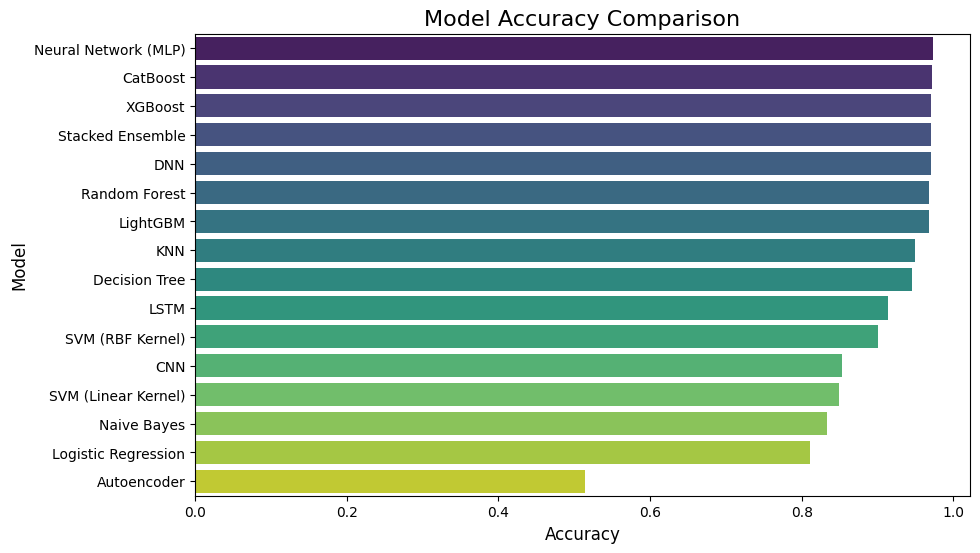

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Corrected accuracy values
results = {
    "Logistic Regression": 0.8104,
    "SVM (Linear Kernel)": 0.8491,
    "SVM (RBF Kernel)": 0.9012,
    "Random Forest": 0.9680,
    "Decision Tree": 0.9453,
    "KNN": 0.9493,
    "Naive Bayes": 0.8331,
    "XGBoost": 0.9706,
    "LightGBM": 0.9680,
    "CatBoost": 0.9720,
    "Neural Network (MLP)": 0.9733,
    "Stacked Ensemble": 0.9706,
    "DNN": 0.9706,
    "LSTM": 0.9132,
    "Autoencoder": 0.5140,
    "CNN": 0.8531
}

# Create a dataframe from the results dictionary
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Sort the dataframe based on accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Display the plot
plt.show()
